In [26]:
import os
import json
import numpy as np


try:
    from bitarray import bitarray
except ImportError:
    bitarray = None

In [2]:
dir="./data/"

In [32]:
from torchvision import datasets, transforms
transform_train = transforms.Compose([
			transforms.RandomCrop(32, padding=4),
			transforms.RandomHorizontalFlip(),
			transforms.ToTensor(),
			transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
		])

transform_test = transforms.Compose([
			transforms.ToTensor(),
			transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
		])
		
train_dataset = datasets.CIFAR10(dir, train=True, download=True,
										transform=transform_train)
eval_dataset = datasets.CIFAR10(dir, train=False, transform=transform_test)

Files already downloaded and verified


In [34]:
print(train_dataset)

AttributeError: 'CIFAR10' object has no attribute 'shape'

In [2]:
import json

try:
    import redis
except ImportError:
    redis = None

__all__ = ['storage']

In [3]:
class BaseStorage(object):
    def __init__(self, config):
        """ An abstract class used as an adapter for storages. """
        raise NotImplementedError

    def keys(self):
        """ Returns a list of binary hashes that are used as dict keys. """
        raise NotImplementedError

    def set_val(self, key, val):
        """ Set `val` at `key`, note that the `val` must be a string. """
        raise NotImplementedError

    def get_val(self, key):
        """ Return `val` at `key`, note that the `val` must be a string. """
        raise NotImplementedError

    def append_val(self, key, val):
        """ Append `val` to the list stored at `key`.

        If the key is not yet present in storage, create a list with `val` at
        `key`.
        """
        raise NotImplementedError

    def get_list(self, key):
        """ Returns a list stored in storage at `key`.

        This method should return a list of values stored at `key`. `[]` should
        be returned if the list is empty or if `key` is not present in storage.
        """
        raise NotImplementedError

In [4]:
class RedisStorage(BaseStorage):
    def __init__(self, config):
        if not redis:
            raise ImportError("redis-py is required to use Redis as storage.")
        self.name = 'redis'
        self.storage = redis.StrictRedis(**config)

    def keys(self, pattern="*"):
        return self.storage.keys(pattern)

    def set_val(self, key, val):
        self.storage.set(key, val)

    def get_val(self, key):
        return self.storage.get(key)

    def append_val(self, key, val):
        self.storage.rpush(key, json.dumps(val))

    def get_list(self, key):
        return self.storage.lrange(key, 0, -1)

In [5]:
class InMemoryStorage(BaseStorage):
    def __init__(self, config):
        self.name = 'dict'
        self.storage = dict()

    def keys(self):
        return self.storage.keys()

    def set_val(self, key, val):
        self.storage[key] = val

    def get_val(self, key):
        return self.storage[key]

    def append_val(self, key, val):
        self.storage.setdefault(key, []).append(val)

    def get_list(self, key):
        return self.storage.get(key, [])

In [6]:

def storage(storage_config, index):
    """ Given the configuration for storage and the index, return the
    configured storage instance.
    """
    if 'dict' in storage_config:
        return InMemoryStorage(storage_config['dict'])
    elif 'redis' in storage_config:
        storage_config['redis']['db'] = index
        return RedisStorage(storage_config['redis'])
    else:
        raise ValueError("Only in-memory dictionary and Redis are supported.")

In [39]:
import math
import random

In [38]:
def Givens_generation(dim,i,j):
    random.seed()
    rad= random.randint(0,int(2*math.pi))
    c=math.cos(rad)
    s=math.sin(rad)
    matrix=[[0 for temp1 in range(dim)] for temp2 in range(dim)]
    for i_i in range(dim):
        for j_j in range(dim):
            if i_i==j_j:
                if i_i==i or i_i==j:
                    matrix[i_i][j_j]=c
                else:
                    matrix[i_i][j_j]=1
            if i_i==i and j_j==j:
                matrix[i_i][j_j]=s
            if i_i==j and j_j==i:
                matrix[i_i][j_j]=-s
    return matrix         

In [29]:
import time
time1=time.time()
print(np.array(Givens_generation(5,1,3)))
time2=time.time()
print(time2-time1)

[[ 1.          0.          0.          0.          0.        ]
 [ 0.         -0.65364362  0.         -0.7568025   0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.7568025   0.         -0.65364362  0.        ]
 [ 0.          0.          0.          0.          1.        ]]
0.0


In [40]:
def Givens_generation2(dim,i,j):
    random.seed()
    rad= random.randint(0,int(2*math.pi))
    c=math.cos(rad)
    s=math.sin(rad)
    matrix=[[0 for temp1 in range(dim)] for temp2 in range(dim)]
    for i_i in range(dim):
        if i_i == i or i_i==j:
            matrix[i_i][i_i]=c
        else:
            matrix[i_i][i_i]=1
    matrix[i][j]=s
    matrix[j][i]=-s
    return matrix   

In [25]:
print(np.array(Givens_generation2(5,1,3)))

[[ 1.          0.          0.          0.          0.        ]
 [ 0.         -0.65364362  0.         -0.7568025   0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.7568025   0.         -0.65364362  0.        ]
 [ 0.          0.          0.          0.          1.        ]]


In [31]:
def secret_key(x,y,l):
    """
    x: the dimension of m
    y: the dimension of d
    l: the number of Givens
    """
    secret_k=[]
    q=[]
    p=[]
    random.seed()
    for i in range(l): 
        p.append(Givens_generation(x,random.randint(0,int(x/2)),random.randint(int(x/2),x)))
    for i in range(l): 
        q.append(Givens_generation(y,random.randint(0,int(y/2)),random.randint(int(y/2),y)))
    secret_k.append(p)
    secret_k.append(q)
    secret_k.append(random.random()*1000)
    return secret_k

In [10]:
key=np.array([1,2])
value=np.array([3,4])
print(dict(zip(key,value)))

{1: 3, 2: 4}


In [11]:
class LSHash(object):
    """ LSHash implments locality sensitive hashing using random projection for
    input vectors of dimension `input_dim`.

    Attributes:

    :param hash_size:
        The length of the resulting binary hash in integer. E.g., 32 means the
        resulting binary hash will be 32-bit long.
    :param input_dim:
        The dimension of the input vector. E.g., a grey-scale picture of 30x30
        pixels will have an input dimension of 900.
    :param num_hashtables:
        (optional) The number of hash tables used for multiple lookups.
    :param storage_config:
        (optional) A dictionary of the form `{backend_name: config}` where
        `backend_name` is the either `dict` or `redis`, and `config` is the
        configuration used by the backend. For `redis` it should be in the
        format of `{"redis": {"host": hostname, "port": port_num}}`, where
        `hostname` is normally `localhost` and `port` is normally 6379.
    :param matrices_filename:
        (optional) Specify the path to the compressed numpy file ending with
        extension `.npz`, where the uniform random planes are stored, or to be
        stored if the file does not exist yet.
    :param overwrite:
        (optional) Whether to overwrite the matrices file if it already exist
    """

    def __init__(self, hash_size, input_dim, num_hashtables=3,w=4,
                 storage_config=None, matrices_filename=None, overwrite=False,uniform_planes=None,threhold=None):

        self.hash_size = hash_size
        self.input_dim = input_dim
        self.num_hashtables = num_hashtables
        self.w=w

        if storage_config is None:
            storage_config = {'dict': None}
        self.storage_config = storage_config

        if matrices_filename and not matrices_filename.endswith('.npz'):
            raise ValueError("The specified file name must end with .npz")
        self.matrices_filename = matrices_filename
        self.overwrite = overwrite
        if threhold==None:
            self.threhold=w**2
        else:
            self.threhold=threhold
        if uniform_planes==None:
            self._init_uniform_planes()
        else:
            print("inital")
            self.uniform_planes=uniform_planes
#         self._init_hashtables()
    

    def _init_uniform_planes(self):
        """ Initialize uniform planes used to calculate the hashes

        if file `self.matrices_filename` exist and `self.overwrite` is
        selected, save the uniform planes to the specified file.

        if file `self.matrices_filename` exist and `self.overwrite` is not
        selected, load the matrix with `np.load`.

        if file `self.matrices_filename` does not exist and regardless of
        `self.overwrite`, only set `self.uniform_planes`.
        """

        if "uniform_planes" in self.__dict__:
            return

        if self.matrices_filename:
            file_exist = os.path.isfile(self.matrices_filename)
            if file_exist and not self.overwrite:
                try:
                    npzfiles = np.load(self.matrices_filename)
                except IOError:
                    print("Cannot load specified file as a numpy array")
                    raise
                else:
                    npzfiles = sorted(npzfiles.items(), key=lambda x: x[0])
                    self.uniform_planes = [t[1] for t in npzfiles]
            else:
                self.uniform_planes = [self._generate_uniform_planes()
                                       for _ in range(self.num_hashtables)]
                try:
                    np.savez_compressed(self.matrices_filename,
                                        *self.uniform_planes)
                except IOError:
                    print("IOError when saving matrices to specificed path")
                    raise
        else:
            self.uniform_planes = [self._generate_uniform_planes()
                                   for _ in range(self.num_hashtables)]


    def _init_hashtables(self):
        """ Initialize the hash tables such that each record will be in the
        form of "[storage1, storage2, ...]" """

        self.hash_tables = [storage(self.storage_config, i)
                            for i in range(self.num_hashtables)]

    def _generate_uniform_planes(self):
        """ Generate uniformly distributed hyperplanes and return it as a 2D
        numpy array.
        """

        return np.random.randn(self.hash_size, self.input_dim)
    
    def assign_hash(self,Hash_table_cy,secret_k,y_train=None):
        hash_tables=[]
        for i in range(len(Hash_table_cy)):
            b=np.array([random.uniform(0,self.w) for j in 
                        range(len(Hash_table_cy[i]))])
            items=np.array(list(hash_table_cy[i].items()))
            keys=np.transpose(np.array([list(temp) for temp in items[:,0]]))
            values=items[:,1]
            for p in secret_k[0]:
                temp=np.dot(keys,np.array(p))
            keys=np.floor((np.transpose(temp)/(secret_k[2]**2)+np.transpose(b*np.ones((temp.shape[0],len(b)))))/4)
            keys=[tuple(temp) for temp in keys]
            hash_table_temp=dict(zip(keys,values))
            hash_tables.append(hash_table_temp)
            print(hash_tables[i])
        self.hash_tables = [storage(self.storage_config, i)
                            for i in range(self.num_hashtables)]
        for i, table in enumerate(self.hash_tables):
            for (key,value) in hash_tables[i].items():
                table.append_val(key,tuple(value[0]))
                
    def _hash(self, planes, input_point,w=4):
        """ Generates the binary hash for `input_point` and returns it.

        :param planes:
            The planes are random uniform planes with a dimension of
            `hash_size` * `input_dim`.
        :param input_point:
            A Python tuple or list object that contains only numbers.
            The dimension needs to be 1 * `input_dim`.
        """

        try:
            b=random.uniform(0,w)
            input_point = np.array(input_point)  # for faster dot product
            projections =np.floor((np.dot(planes, input_point)+b)/w)
        except TypeError as e:
            print("""The input point needs to be an array-like object with
                  numbers only elements""")
            raise
        except ValueError as e:
            print("""The input point needs to be of the same dimension as
                  `input_dim` when initializing this LSHash instance""", e)
            raise
        else:
            return tuple(projections)

    def _as_np_array(self, json_or_tuple):
        """ Takes either a JSON-serialized data structure or a tuple that has
        the original input points stored, and returns the original input point
        in numpy array format.
        """
        if isinstance(json_or_tuple, str):
            # JSON-serialized in the case of Redis
            try:
                # Return the point stored as list, without the extra data
                tuples = json.loads(json_or_tuple)[0]
            except TypeError:
                print("The value stored is not JSON-serilizable")
                raise
        else:
            # If extra_data exists, `tuples` is the entire
            # (point:tuple, extra_data). Otherwise (i.e., extra_data=None),
            # return the point stored as a tuple
            tuples = json_or_tuple

        if isinstance(tuples[0], tuple):
            # in this case extra data exists
            return np.asarray(tuples[0])

        elif isinstance(tuples, (tuple, list)):
            try:
                return np.asarray(tuples)
            except ValueError as e:
                print("The input needs to be an array-like object", e)
                raise
        else:
            raise TypeError("query data is not supported")

    def index(self, input_point, extra_data=-1):
        """ Index a single input point by adding it to the selected storage.

        If `extra_data` is provided, it will become the value of the dictionary
        {input_point: extra_data}, which in turn will become the value of the
        hash table. `extra_data` needs to be JSON serializable if in-memory
        dict is not used as storage.

        :param input_point:
            A list, or tuple, or numpy ndarray object that contains numbers
            only. The dimension needs to be 1 * `input_dim`.
            This object will be converted to Python tuple and stored in the
            selected storage.
        :param extra_data:
            (optional) Needs to be a JSON-serializable object: list, dicts and
            basic types such as strings and integers.
        """

        if isinstance(input_point, np.ndarray):
            input_point = input_point.tolist()

        if extra_data!=-1:
            value = (tuple(input_point), extra_data)
        else:
            value = tuple(input_point)

        for i, table in enumerate(self.hash_tables):
            table.append_val(self._hash(self.uniform_planes[i], input_point,self.w),
                             value)

    def query(self, query_point, num_results=None, distance_func=None):
        """ Takes `query_point` which is either a tuple or a list of numbers,
        returns `num_results` of results as a list of tuples that are ranked
        based on the supplied metric function `distance_func`.

        :param query_point:
            A list, or tuple, or numpy ndarray that only contains numbers.
            The dimension needs to be 1 * `input_dim`.
            Used by :meth:`._hash`.
        :param num_results:
            (optional) Integer, specifies the max amount of results to be
            returned. If not specified all candidates will be returned as a
            list in ranked order.
        :param distance_func:
            (optional) The distance function to be used. Currently it needs to
            be one of ("hamming", "euclidean", "true_euclidean",
            "centred_euclidean", "cosine", "l1norm"). By default "euclidean"
            will used.
        """

        candidates = set()
        if not distance_func:
            distance_func = "euclidean"

        if distance_func == "hamming":
            if not bitarray:
                raise ImportError(" Bitarray is required for hamming distance")

            for i, table in enumerate(self.hash_tables):
                binary_hash = self._hash(self.uniform_planes[i], query_point,w=self.w)
                for key in table.keys():
                    distance = LSHash.hamming_dist(key, binary_hash)
                    if distance < 2:
                        candidates.update(table.get_list(key))

            d_func = LSHash.euclidean_dist_square

        else:

            if distance_func == "euclidean":
                d_func = LSHash.euclidean_dist_square
            elif distance_func == "true_euclidean":
                d_func = LSHash.euclidean_dist
            elif distance_func == "centred_euclidean":
                d_func = LSHash.euclidean_dist_centred
            elif distance_func == "cosine":
                d_func = LSHash.cosine_dist
            elif distance_func == "l1norm":
                d_func = LSHash.l1norm_dist
            else:
                raise ValueError("The distance function name is invalid.")

            for i, table in enumerate(self.hash_tables):
                binary_hash = self._hash(self.uniform_planes[i], query_point,w=self.w)
                key_all=list(table.keys())
                for j in key_all:
                    distance=d_func(binary_hash,j)
                    if distance < self.threhold :
                        temp=table.get_list(j)
                        candidates.update(temp)
        # rank candidates by distance function
#         print(d_func(query_point, self._as_np_array(ix))  
    
        candidates = [(ix, d_func(query_point, self._as_np_array(ix)))
                      for ix in candidates]
        candidates.sort(key=lambda x: x[1])

        return candidates[:num_results] if num_results else candidates

    ### distance functions

    @staticmethod
    def hamming_dist(bitarray1, bitarray2):
        xor_result = bitarray(bitarray1) ^ bitarray(bitarray2)
        return xor_result.count()

    @staticmethod
    def euclidean_dist(x, y):
        """ This is a hot function, hence some optimizations are made. """
        diff = np.array(x) - y
        return np.sqrt(np.dot(diff, diff))

    @staticmethod
    def euclidean_dist_square(x, y):
        """ This is a hot function, hence some optimizations are made. """
        diff = np.array(x) - y
        return np.dot(diff, diff)

    @staticmethod
    def euclidean_dist_centred(x, y):
        """ This is a hot function, hence some optimizations are made. """
        diff = np.mean(x) - np.mean(y)
        return np.dot(diff, diff)

    @staticmethod
    def l1norm_dist(x, y):
        return sum(abs(x - y))

    @staticmethod
    def cosine_dist(x, y):
        return 1 - np.dot(x, y) / ((np.dot(x, x) * np.dot(y, y)) ** 0.5)

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
dict1 = unpickle('data/cifar-10-batches-py/data_batch_1')
dict2 = unpickle('data/cifar-10-batches-py/data_batch_2')
dict3 = unpickle('data/cifar-10-batches-py/data_batch_3')
dict4 = unpickle('data/cifar-10-batches-py/data_batch_4')
dict5 = unpickle('data/cifar-10-batches-py/data_batch_5')
test_data = unpickle('data/cifar-10-batches-py/test_batch')
# print(dict)

In [ ]:
print(enumerate(range(2,10)))

In [8]:
imag_train=np.vstack((dict1[b'data'],dict2[b'data'],dict3[b'data'],dict4[b'data'],dict5[b'data']))

In [9]:
label_train=dict1[b'labels']+dict2[b'labels']+dict3[b'labels']+dict4[b'labels']+dict5[b'labels']

In [10]:
imag_test=test_data[b'data']
label_test=test_data[b'labels']

In [11]:
print(imag_train[0].shape)

(3072,)


In [12]:
print(imag_train.shape)

(50000, 3072)


In [18]:
import time

In [19]:
def lsh_iteration(data,start_dim=6,stop_dim=1000,shape=3072,num_hashs=4,w=3):
    time_dim_cost=[]
    lsh_hashs=[]
    for i in range(start_dim,stop_dim+1,100):
        time_hash_num_cost=[]
        lsh_hash_num=[]
        for m in range(1,num_hashs+1,10):
            time_w_cost=[]
            lsh_w=[]
            for n in range(2,w+1,3):
                print(f"dim {i},hash_num {m}, w {n}")
                lsh=LSHash(i,shape,num_hashtables=m,w=n)
                time_start=time.time()
                for j in range(len(data)):
                    lsh.index(data[j],j)
                time_end=time.time()
                time_cost_all=time_end-time_start
                print()
                time_w_cost.append(time_cost_all)
                lsh_w.append(lsh)
            time_hash_num_cost.append(time_w_cost)
            lsh_hash_num.append(lsh_w)
        lsh_hashs.append(lsh_hash_num)
        time_dim_cost.append(time_hash_num_cost)
    return time_dim_cost,lsh_hashs

In [ ]:
time_dim_cost=lsh_iteration(imag_train)

In [55]:
w_s=lsh.uniform_planes
w_s_np=np.array(w_s)

In [202]:
print(w_s_np.shape)

(3, 6, 3072)


In [54]:
print(len(w_s))
print(len(w_s[0]))
print(len(w_s[1]))
print(w_s[0][1])

3
6
6
[-1.3344921   0.00910465 -1.20712552 ... -0.49399618 -0.48847675
  0.99759489]


In [45]:
print(random.uniform(0,5))

2.4274897144954624


In [58]:
#image_train,labels
print(imag_train.shape)
print((np.transpose(np.array(label_train))).shape)

(50000, 3072)
(50000,)


In [16]:
print(type(imag_train))

<class 'numpy.ndarray'>


In [68]:
train_data=np.hstack((imag_train,np.array(label_train).reshape(-1,1)))

In [15]:
from sklearn.model_selection import train_test_split

In [2]:
def gen_uniform_planes(num_hash_tables,hash_size,input_dim): 
    uniform_planes = [np.random.randn(hash_size, input_dim) for _ in range(num_hash_tables)]
    return uniform_planes

In [34]:
temp_uni=gen_uniform_planes(3,4,5)
print(temp_uni)

[array([[ 0.78442964,  0.654117  , -0.25866042, -0.06706825,  0.21665155],
       [ 0.91978496, -1.03671652,  0.27803934, -1.55628817, -2.75479399],
       [-0.90968192, -0.41241746,  0.28657057,  0.02729929,  1.64659666],
       [-0.58691849, -0.73148215,  1.5158062 ,  0.04428437,  0.33301302]]), array([[-0.09821242, -0.1827236 , -0.77274765,  0.96018331,  1.31713256],
       [ 2.98585506,  0.25784886, -1.02554346,  0.51077636, -1.01698544],
       [ 0.29056282, -0.82742638,  0.66005795,  0.93190842, -0.70827026],
       [ 0.24352294,  1.76382094,  0.2892221 , -0.66078849, -0.14942396]]), array([[ 0.24304118,  0.05635942,  0.71458682, -1.04543517,  0.37542683],
       [ 2.72067073, -1.2381236 , -0.08350851, -0.47952986, -3.34495625],
       [ 1.10487686,  0.6225801 , -0.40416742,  0.15895104, -0.37028666],
       [ 1.11131598,  0.37675367,  0.42175238, -1.36213814,  0.35474101]])]


In [27]:
def create_x_cy(train_x,secret_k):
    train_x_cy=secret_k[2]*train_x
    for p in secret_k[0]:  
        train_x_cy=np.dot(np.array(p),train_x_cy)
    for q in secret_k[1]:
        train_x_cy=np.dot(train_x_cy,np.array(q))
    return train_x_cy

In [30]:
def create_w_cy(w,secret_k):
    w_cy=[]
    for i in w:
        i_cy=secret_k[2]*i
        for q in secret_k[1]:
            i_cy=np.dot(i_cy,np.array(q))
        w_cy.append(i_cy)
    return w_cy

In [43]:
import random
temp=create_w_cy(temp_uni,secret_key(3,5,4))
print(len(temp),temp[0].shape)

3 (4, 5)


In [30]:
import pickle

In [ ]:
time_dim_cost_all=[]
secret_k_all=[]
num_hash_tables=4
hash_size=10
for dim in range(1000,10000,500):
    train_x2,valid_x2,train_y2,valid_y2=train_test_split(imag_train,label_train,train_size=dim/50000,random_state=8,stratify=label_train)
    time_start=time.time()
    secret_k=secret_key(train_x2.shape[0],train_x2.shape[1],10)
    secret_k_all.append(secret_k)
    uniform_planes=gen_uniform_planes(num_hash_tables,hash_size,3072)
    x_train_cyber=create_x_cy(train_x2,secret_k)
    w_cyber=create_w_cy(np.array(uniform_planes),secret_k)
    time_end=time.time()
    with open(f"x_train_cyber{dim}.pkl","wb") as f:
        pickle.dump(x_train_cyber,f)
    with open(f"w_cyber{dim}.pkl","wb") as f:
        pickle.dump(w_cyber,f)
    time_temp=time_end-time_start
    time_dim_cost_all.append(time_dim_cost_all)

In [651]:
print(len(time_dim_cost_all))
print(len(secret_k_all))

12
12


In [16]:
train_x,valid_x,train_y,valid_y=train_test_split(imag_train,label_train,1,random_state=8,stratify=label_train)
test_x,temp_x,test_y,temp_y=train_test_split(imag_test,label_test,train_size=0.1,random_state=8,stratify=label_test)

InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 1.0 instead.

In [26]:
chunks = np.array_split(imag_train, 3, axis=0)
chunks_label = np.array_split(label_train, 3, axis=0)

In [27]:
print(chunks[0].shape)
print(chunks[1].shape)
print(chunks[2].shape)
print(chunks_label[0].shape)
print(chunks_label[1].shape)
print(chunks_label[2].shape)

(16667, 3072)
(16667, 3072)
(16666, 3072)
(16667,)
(16667,)
(16666,)


In [12]:
print(train_x.shape)

NameError: name 'train_x' is not defined

In [30]:
# 可视化显示
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 十个类别
classes = ('plane','car','bird','cat','deer',
          'dog','frog','horse','ship','truck')
def imshow(img,filename):
    img=np.array(img)
    img=img.reshape(3,32,32).transpose(1,2,0)# 改变通道顺序
    cv2.imwrite(filename,img)
    # plt.axis('off')
    # plt.imshow(img)
    # plt.savefig(filename,bbox_inches='tight', pad_inches=0)  
for i in range(50000):  
    # 随机获取一批数据
    imgs,labs = imag_train[i],label_train[i]
    imshow(imgs,f"data/cifar10_img/{labs}_{i}.png")  

In [81]:
def transpose_img(img,fre):
    """
    x: the dimension of m
    y: the dimension of d
    l: the number of Givens
    """
    q=[]
    random.seed()
    for i in range(fre): 
        q.append(Givens_generation(3072,random.randint(0,int(3072/2)),random.randint(int(3072/2),3072)))
    for i in q:
        img=np.dot(img,np.array(i))
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [10.0..227.0].


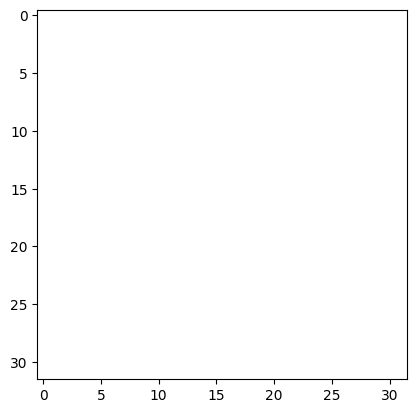

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-208.78254006388332..227.0].


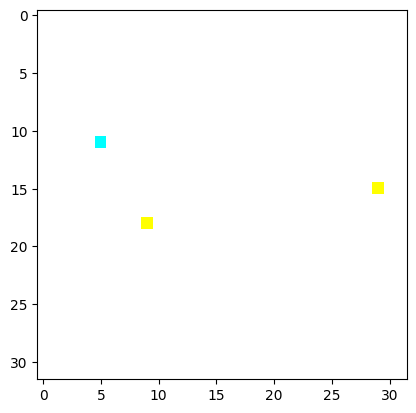

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-214.6442029506093..227.0].


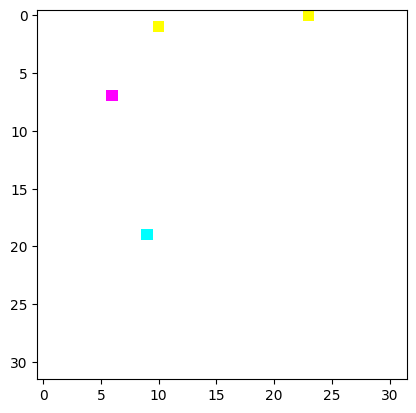

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-66.90043462501343..227.0].


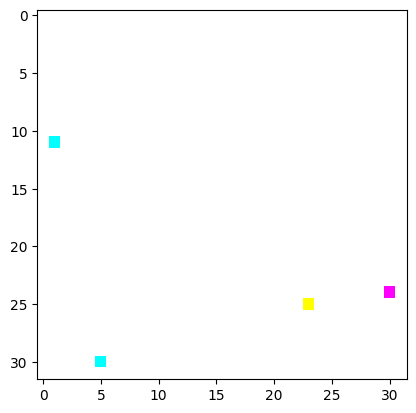

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-206.08969346349176..227.0].


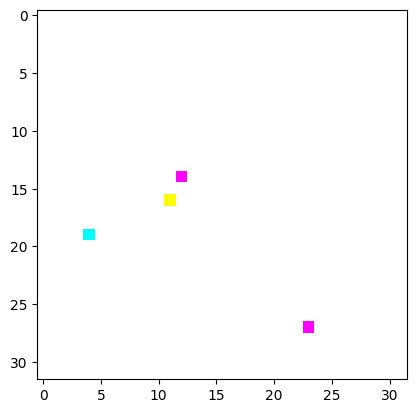

In [85]:
for i in range(1,6):
    img_trans=transpose_img(imgs,i)
    imshow(img_trans)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [10.0..227.0].


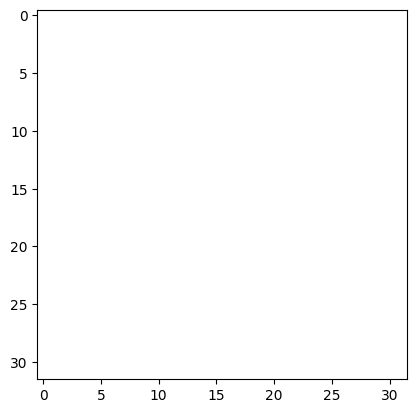

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-186.20992871624568..227.0].


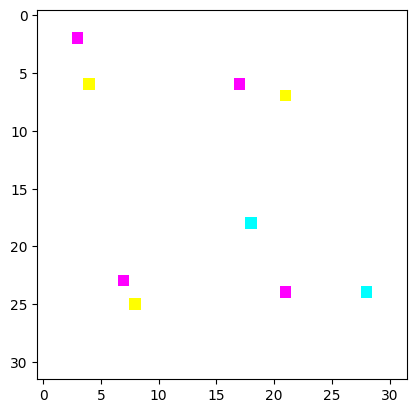

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-277.2380193909787..227.0].


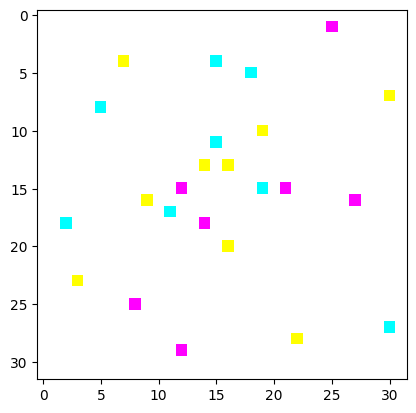

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-206.03102857993565..227.0].


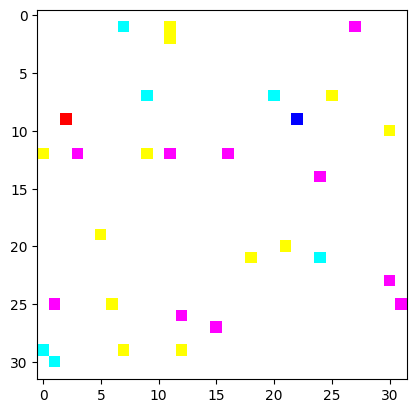

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-216.62634038399156..227.0].


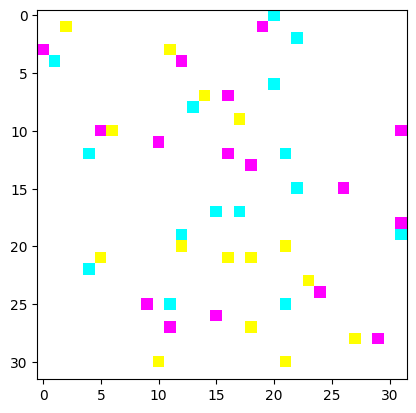

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-194.36312878994198..228.3496410778247].


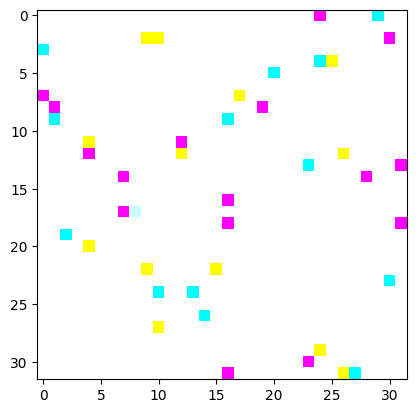

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-222.8565061580114..227.0].


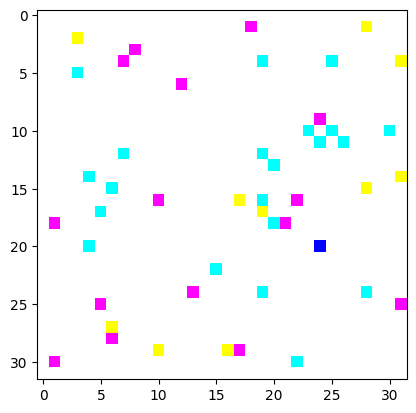

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-269.4298985629619..227.3229300542453].


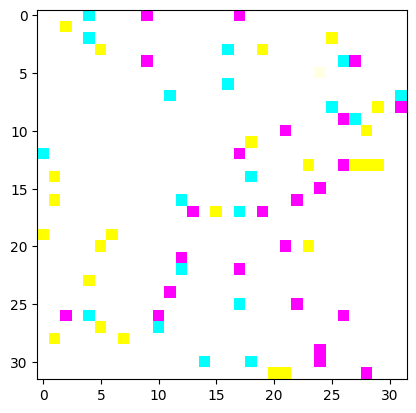

MemoryError: Unable to allocate 72.0 MiB for an array with shape (3072, 3072) and data type float64

In [86]:
for i in range(1,100,10):
    img_trans=transpose_img(imgs,i)
    imshow(img_trans)

In [69]:
print(np.array(temp))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [46]:
secret_k=secret_key(train_x.shape[0],train_x.shape[1],10)

In [48]:
print(secret_k)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [176]:
print(np.array(secret_k[0]).shape)

(10, 1000, 1000)


In [80]:
print(np.array(w_s[0]).shape)

(6, 3072)


In [79]:
print(secret_k[2]*w_s[0])

[[-1.40158389e+02  5.37469879e+02  3.39742124e+02 ... -1.11426194e+03
   1.98607936e+02  1.42795398e+02]
 [-8.39294688e+02  5.72613422e+00 -7.59190732e+02 ... -3.10686269e+02
  -3.07214962e+02  6.27411803e+02]
 [-1.43861516e+02 -4.70784705e+02  5.51802446e+02 ...  1.18792421e+02
   2.32468720e+01 -2.39928814e+02]
 [-2.29371851e+02  5.67967101e+02  9.05212416e+01 ... -8.29415703e+02
   1.41176417e+02 -8.46823449e+02]
 [-6.37264485e+02 -3.87569858e-02 -8.41266747e+02 ... -8.95322165e+02
  -2.89914158e+02  8.08821338e+02]
 [-1.38910762e+03 -1.86421849e+02 -9.44355772e+02 ... -3.36302730e+01
  -1.99775642e+01  8.37042709e+02]]


In [610]:
import pickle
with open("secret_key.pkl",'wb') as f:
    pickle.dump(secret_k,f)

In [38]:
a=np.random.random((1000,500))

In [40]:
import math

In [37]:
def Givens_generation(dim, i, j):
    """dim is the dimension of the matrix dim*dim
    i is the row index
    j is the column index is
    """
    random.seed()
    rad = random.randint(0, int(2 * math.pi))
    c = math.cos(rad)
    s = math.sin(rad)
    matrix = [[0 for temp1 in range(dim)] for temp2 in range(dim)]
    for i_i in range(dim):
        if i_i == i or i_i == j:
            matrix[i_i][i_i] = c
        else:
            matrix[i_i][i_i] = 1
    print("i,j=",i,j)
    matrix[i][j] = s
    matrix[j][i] = -s
    return matrix

In [41]:
b=Givens_generation(500, 200, 300)

i,j= 200 300


In [43]:
print(a)
print(np.array(b))

[[0.49436617 0.3040261  0.69339651 ... 0.04191033 0.80648631 0.51575964]
 [0.82921841 0.44737421 0.11817656 ... 0.21896258 0.53036543 0.46072632]
 [0.41850335 0.10204393 0.63401019 ... 0.42759788 0.49850569 0.35025039]
 ...
 [0.8403983  0.90642785 0.74282279 ... 0.34510115 0.12794737 0.24336307]
 [0.44079454 0.51598239 0.26645546 ... 0.35329072 0.377344   0.14968154]
 [0.94712839 0.71944722 0.05708814 ... 0.25049711 0.12185779 0.90930132]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [44]:
print(np.array(b)[200,300])

0.9092974268256817


In [46]:
import time

In [48]:
ben=time.time()
np.dot(a,b)
end=time.time()
time_cost=end-ben
print(time_cost)

0.1179659366607666


In [53]:
import scipy.sparse as sp

In [54]:
ben=time.time()
a@sp.csr_matrix(b)
end=time.time()
time_cost=end-ben
print(time_cost)

0.033937692642211914


In [612]:
with open("secret_key.pkl","rb") as f:
    temp=pickle.load(f)

In [613]:
print(temp[2])

628.9244345905104


In [72]:
import time

In [73]:
time_start=time.time()
train_x_cy=create_x_cy(train_x,secret_k)
time_end=time.time()
time_cost_x_cy=time_end-time_start

In [75]:
print(time_cost_x_cy)

8.58880090713501


In [222]:
print(len(secret_k[0]))

10


In [82]:
time_start=time.time()
w_cy=create_w_cy(w_s,secret_k)
time_end=time.time()
time_cost_w_cy=time_end-time_start

In [87]:
print(train_x_cy.shape)

(1000, 3072)


In [88]:
import csv

In [90]:
with open("train_x_cy.csv",'w',newline='') as file:
    writer=csv.writer(file)
    for i in train_x_cy:
        writer.writerow(i)

In [433]:
print(len(train_y))

1000


In [434]:
with open("y_train.csv",'w',newline='') as file:
    writer=csv.writer(file)
    writer.writerow(train_y)

In [91]:
for i in range(len(w_cy)):
    with open(f"w{i}.csv",'w',newline='') as file:
        writer=csv.writer(file)
        for j in w_cy[i]:
            writer.writerow(j)

In [84]:
print(time_cost_w_cy)
print(len(w_cy))
print(w_cy[0].shape)

18.704121351242065
3
(6, 3072)


In [437]:
hash_table_cy1=unpickle("dict0 (2).pkl")
hash_table_cy2=unpickle("dict1 (2).pkl")
hash_table_cy3=unpickle("dict2 (2).pkl")

In [438]:
print(len(hash_table_cy1))

1000


In [439]:
hash_table_cy=[hash_table_cy1,hash_table_cy2,hash_table_cy3]

In [440]:
r=[random.random() for i in range(6)]

In [441]:
print(np.array(r).shape)

(6,)


In [443]:
print(list(hash_table_cy[0].values())[0])

[((117608.86926842543, 116979.94483383493, 116351.02039924441, 116351.02039924441, 116351.02039924441, 115722.09596465391, 113835.32266088238, 114464.24709547289, 115093.1715300634, 115093.1715300634, 115093.1715300634, 115093.1715300634, 115093.1715300634, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113206.39822629187, 112577.47379170136, 112577.47379170136, 112577.47379170136, 112577.47379170136, 112577.47379170136, 111948.54935711085, 111319.62492252034, 111319.62492252034, 119495.64257219697, 118237.79370301595, 118237.79370301595, 118237.79370301595, 118237.79370301595, 116979.94483383493, 115722.09596465391, 116351.02039924441, 116979.94483383493, 116979.94483383493, 116979.94483383493, 116979.94483383493, 116351.02039924441, 115722.09596465391, 115722.09596465391, 115722.09596465391, 115722.09596465391, 115722.09596465391, 11

In [158]:
print(train_x_cy.shape)

(1000, 3072)


In [159]:
#6 *[6,3072]  =3072
#w_cy:(3, 6, 3072)
v=np.dot(np.array(r),np.array(w_cy[0]))

In [160]:
#3072*[3072,1000] = 1000
v=np.dot(v,np.transpose(train_x_cy))

In [165]:
print(v)

[ 7.72935238e+08 -4.14150123e+09  2.89871819e+09  2.73706853e+09
  1.71202381e+08  5.81518923e+08 -7.98199242e+08 -3.70809529e+09
  3.09323573e+09  1.49789795e+09  6.01681548e+08  2.55868589e+09
 -5.35189057e+09  1.17138663e+09 -1.68791851e+09 -9.97495194e+08
  5.25253573e+08 -4.33962192e+08  9.26872789e+08  2.66605896e+09
 -5.67363378e+08  1.05800587e+09 -1.59975471e+09  1.27130429e+09
  2.81708156e+09 -9.86591865e+08 -1.12028442e+07 -9.41940743e+08
 -3.49078698e+08 -6.84771843e+08 -4.34107380e+08 -4.63616310e+08
 -3.02815274e+07  1.80050829e+08 -1.63787477e+09 -3.78373829e+08
  1.27029316e+08  1.65876098e+08 -6.37192425e+08  2.55798980e+09
 -9.29096753e+08  4.70804682e+08  3.37894212e+08 -3.67128005e+09
  2.48043421e+09  2.16760719e+09 -1.87902017e+09 -1.57466536e+08
 -2.07602392e+09 -2.00133164e+09 -8.08400682e+07  1.56459369e+09
 -1.44067548e+08  4.11488681e+09  1.21838228e+09 -8.72682601e+08
  3.02475661e+08 -1.56402443e+09  1.70089114e+09  1.28039722e+09
 -2.27481807e+09  3.05790

In [162]:
print(v.shape)

(1000,)


In [30]:
temp2=dict()
temp2.update({1:2,3:4})
temp2.update({5:6,7:8})
print(temp2)
for i in temp2:
    print(i)

{1: 2, 3: 4, 5: 6, 7: 8}
1
3
5
7


In [5]:
import random

In [21]:
x = np.array([[j,j+1,j+2] for j in range(2)])
b = np.array([random.uniform(0, 3) for j in
					  range(3)])

In [34]:
temp = [(i,j) for (i,j) in {1:2,3:4,5:6}.items()]
temp.sort(key=lambda x: x[1],reverse=True)
print(temp)

[(5, 6), (3, 4), (1, 2)]


In [22]:
print(x)
print(b)

[[0 1 2]
 [1 2 3]]
[2.5987008  0.43066643 0.37936192]


In [26]:
print(np.dot(x,b))

[1.18939028 4.59811943]


In [27]:
for i, table in enumerate(x):
    print(i,table)

0 [0 1 2]
1 [1 2 3]


In [163]:
v2=np.dot(np.array(r),np.transpose(np.array(list(hash_table_cy[0].keys()))))

In [164]:
print(v2)

[ 7.72935238e+08 -4.14150123e+09  2.89871819e+09  2.73706853e+09
  1.71202381e+08  5.81518923e+08 -7.98199242e+08 -3.70809529e+09
  3.09323573e+09  1.49789795e+09  6.01681548e+08  2.55868589e+09
 -5.35189057e+09  1.17138663e+09 -1.68791851e+09 -9.97495194e+08
  5.25253573e+08 -4.33962192e+08  9.26872789e+08  2.66605896e+09
 -5.67363378e+08  1.05800587e+09 -1.59975471e+09  1.27130429e+09
  2.81708156e+09 -9.86591865e+08 -1.12028442e+07 -9.41940743e+08
 -3.49078698e+08 -6.84771843e+08 -4.34107380e+08 -4.63616310e+08
 -3.02815274e+07  1.80050829e+08 -1.63787477e+09 -3.78373829e+08
  1.27029316e+08  1.65876098e+08 -6.37192425e+08  2.55798980e+09
 -9.29096753e+08  4.70804682e+08  3.37894212e+08 -3.67128005e+09
  2.48043421e+09  2.16760719e+09 -1.87902017e+09 -1.57466536e+08
 -2.07602392e+09 -2.00133164e+09 -8.08400682e+07  1.56459369e+09
 -1.44067548e+08  4.11488681e+09  1.21838228e+09 -8.72682601e+08
  3.02475661e+08 -1.56402443e+09  1.70089114e+09  1.28039722e+09
 -2.27481807e+09  3.05790

In [175]:
for (key,value) in hash_table_cy[0].items():
    print(key,value)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(-1362906082.7662792, -3514590011.6375074, 1013850079.1632226, 1607299331.126614, 2090579627.4177938, -557403959.554945) [((31446.221729525518, 64150.292328232055, 108803.9271841583, 94967.58962316706, 41509.012682973684, 44653.63485592623, 47798.25702887879, 88049.42084267145, 101885.75840366268, 104401.45614202472, 99370.06066530064, 58489.972416917466, 37106.541640840114, 51571.80363642185, 98112.21179611962, 105659.30501120574, 39622.239379202154, 33332.99503329705, 41509.012682973684, 96854.3629269386, 109432.8516187488, 100627.90953448166, 108803.9271841583, 103143.6072728437, 71068.46110872767, 66037.06563200359, 98741.13623071012, 135218.75343695973, 150312.93986713197, 144023.69552122688, 137105.52674073126, 89936.19414644298, 32704.070598706538, 57861.047982326956, 105659.30501120574, 94967.58962316706, 45282.55929051674, 47798.25702887879, 47169.33259428828, 83018.02536594737, 103772.53170743422, 108803.9271841583, 92451.89188480502, 60376.745720688996, 44024.71042133572, 4

In [174]:
print(type(hash_table_cy[0]))

<class 'dict'>


In [578]:
lsh=LSHash(6,3072,uniform_planes=w_s)

inital


In [579]:
lsh.assign_hash(hash_table_cy,secret_k)

<ipython-input-577-936ebf5f7d97>:117: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  items=np.array(list(hash_table_cy[i].items()))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [605]:
result=lsh.query(test_x[23],10)

In [606]:
print(len(result))

0


In [498]:
temp=(-63.0, -1403.0, -555.0, 784.0, 1627.0, 926.0)

In [486]:
print(tuple(temp))

(-64.0, -1404.0, -556.0, 783.0, 1626.0, 925.0)


In [499]:
result=lsh.hash_tables[0].storage.get(tuple(temp),0)

In [497]:
print(list(lsh.hash_tables[0].storage.keys())[0])

(-63.0, -1403.0, -555.0, 784.0, 1627.0, 926.0)


In [500]:
print(result)

[[((117608.86926842543, 116979.94483383493, 116351.02039924441, 116351.02039924441, 116351.02039924441, 115722.09596465391, 113835.32266088238, 114464.24709547289, 115093.1715300634, 115093.1715300634, 115093.1715300634, 115093.1715300634, 115093.1715300634, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113835.32266088238, 113206.39822629187, 112577.47379170136, 112577.47379170136, 112577.47379170136, 112577.47379170136, 112577.47379170136, 111948.54935711085, 111319.62492252034, 111319.62492252034, 119495.64257219697, 118237.79370301595, 118237.79370301595, 118237.79370301595, 118237.79370301595, 116979.94483383493, 115722.09596465391, 116351.02039924441, 116979.94483383493, 116979.94483383493, 116979.94483383493, 116979.94483383493, 116351.02039924441, 115722.09596465391, 115722.09596465391, 115722.09596465391, 115722.09596465391, 115722.09596465391, 1

In [607]:
hash_table_true=np.floor(np.dot(w_s[0],np.transpose(train_x))/100)

In [354]:
for i in secret_k[0]:
    hash_table_cyp=np.dot(np.transpose(np.array(list(hash_table_cy[0].keys()))),i)

In [363]:
hash_table_cyp2=np.floor((hash_table_cyp/(secret_k[2]**2))/4)

In [362]:
print(secret_k[2])

628.9244345905104


In [475]:
print(np.transpose(hash_table_cyp2)[0])

[  -64. -1404.  -556.   783.  1626.   925.]


In [370]:
print(hash_table_cyp2[0])

[-6.400e+01 -7.090e+02 -4.390e+02 -5.170e+02  4.000e+01 -9.000e+02
  8.150e+02 -1.469e+03  4.630e+02  3.850e+02 -2.040e+02 -2.750e+02
  1.000e+00 -5.700e+01 -1.359e+03 -5.500e+01 -1.840e+02 -4.090e+02
 -1.404e+03  3.440e+02 -1.558e+03 -7.860e+02 -2.240e+02 -5.040e+02
 -1.348e+03 -1.378e+03 -1.651e+03 -2.144e+03 -2.700e+02 -9.000e+00
  9.920e+02 -8.610e+02 -7.630e+02 -1.223e+03 -3.590e+02  9.410e+02
 -6.920e+02 -5.890e+02 -1.191e+03  2.810e+02 -1.770e+02  4.380e+02
 -5.070e+02 -5.750e+02 -4.980e+02  2.600e+02  4.500e+02 -9.990e+02
 -8.920e+02  1.120e+02 -5.730e+02  3.190e+02 -6.250e+02  1.314e+03
  4.820e+02 -1.477e+03 -1.931e+03 -2.100e+02  1.080e+02 -1.409e+03
 -1.208e+03  3.540e+02 -1.740e+03 -6.190e+02 -1.900e+01  7.400e+02
 -2.300e+03  6.260e+02 -1.726e+03 -1.348e+03 -5.540e+02 -1.598e+03
  2.916e+03 -4.600e+02 -1.074e+03 -6.600e+02 -1.369e+03  3.120e+02
 -1.289e+03 -9.300e+02 -5.230e+02 -8.320e+02 -9.440e+02  9.640e+02
 -1.149e+03 -2.560e+02 -3.350e+02 -1.820e+02  1.062e+03 -3.260

In [608]:
print(hash_table_true[0])

[  -3.  -29.  -18.  -21.   -9.  -36.   32.  -59.    8.   15.   -9.  -11.
    0.   -3.  -55.   -3.   -8.  -17.  -57.   13.  -63.  -32.   -9.  -21.
  -54.  -56.  -67.  -86.  -11.   -6.   39.  -35.  -31.  -49.  -15.   37.
  -28.  -24.  -48.   11.   -8.   17.  -21.  -23.  -20.   10.   18.  -40.
  -36.    4.  -23.   12.  -25.   52.   19.  -60.  -78.   -9.    4.  -57.
  -49.   14.  -70.  -25.   -1.   29.  -92.   25.  -70.  -54.  -23.  -64.
  116.  -19.  -43.  -27.  -55.   12.  -52.  -38.  -21.  -34.  -38.   38.
  -46.  -11.  -14.   -8.   42.  -14.  -56.   26.  -33.  -39.  -77.  -12.
    8.  -82.  -24.  -92.  -24.  -31.  -58.  -70.   10.  -63.   -8.  -49.
    6.  -33.  -28.  -80.    6.   -5.  -13.    1.  -14.   22.   24.  -25.
   53.  -24.   26.  -38.  -67.  -49.   -4.  -76.    0.  -39.  -74.  -73.
  -35.  -27.  -36.    5.  -33.  -22.  -34.   -7.  -41.  -46.  -41.   -7.
  -87.   -5.   -6.  -10.   14.  -11.  -11.  -11.  -11.  -75.  -17.  -15.
  -37.  -72.  -29.  -16. -104.   -1.    1.  -33.  -

In [351]:
print(hash_table_true.shape)
print(hash_table_cyp.shape)

(6, 1000)
(6, 1000)


In [233]:
temp=np.array(list(hash_table_cy[0].items()))

<ipython-input-233-a237871639fd>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp=np.array(list(hash_table_cy[0].items()))


In [263]:
a=temp[:,0]

In [257]:
b=temp[:,1]

In [265]:
temp_a=[list(cc) for cc in a]
temp_b=[list(cc) for cc in b]

In [270]:
print(len(temp_b[0][0]))

3072


In [271]:
print(len(b[0:2]))

2


In [247]:
print(type(secret_k[0][0][0][0]))

<class 'int'>


In [298]:
print(np.array([1,2,3])*np.ones((6,3)))

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [299]:
print(len([1,2,3]))

3


In [286]:
print(np.transpose(np.ones((6,3))))

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [302]:
hash_table=[]
for i in range(len(hash_table_cy)):
    b=np.array([random.uniform(0,4) for j in 
                range(len(hash_table_cy[i]))])
    items=np.array(list(hash_table_cy[i].items()))
    keys=np.transpose(np.array([list(temp) for temp in items[:,0]]))
    values=items[:,1]
    for p in secret_k[0]:
        temp=np.dot(keys,np.array(p))
    keys=np.floor((np.transpose(temp)/(secret_k[2]**2)+np.transpose(b*np.ones((temp.shape[0],len(b)))))/4)
    keys=(tuple(temp) for temp in keys)
    hash_table_temp=dict(zip(keys,values))
    hash_table.append(hash_table_temp)

<ipython-input-302-22f6c49a4d79>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  items=np.array(list(hash_table_cy[i].items()))


In [304]:
print(len(hash_table[0]))

1000


In [ ]:
def accuracy(lsh,y,test_data,test_y,max_num=5):
    total=0
    correct=0
    for i in range(len(test_data)):
        result=lsh.query(test_data[i],max_num)
        if i%100==0:
            print("epoch {}:{}".format(i,len(result)))
        if len(result)>0:
            for hash_result in result:
                if y[hash_result[0][1]]==test_y[i]:
                    correct=correct+1
                total=total+1
    return correct/total

In [84]:
print(set(train_y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [87]:
print(train_y.count(9))

100


In [80]:
print(len(train_data2[0].shape))

TypeError: 'generator' object is not subscriptable

In [22]:
result=lsh.query(imag_train[4],4)

In [ ]:
def generate_dataset(image, num=100):
    
    

In [24]:
print(len(result))

4


In [ ]:
print(len(label_train))

In [ ]:
img = dict[b'data']
print(img.shape)

In [ ]:
print(type(img))

In [614]:
import matplotlib.pyplot as plt

In [615]:
time_cost_origin=np.load("time_cost.npy")

In [617]:
print(len(time_cost_origin))
print(len(time_cost_origin[0]))
print(len(time_cost_origin[0][0]))

10
10
7


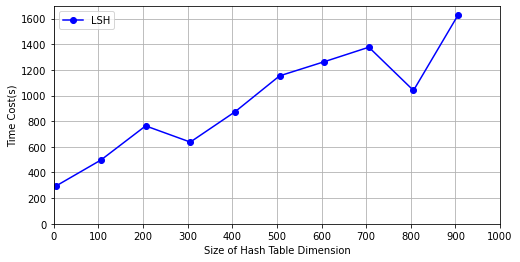

In [634]:
plt.figure(figsize=(8,4))
x_values=range(6,1001,100)
# x_tickes=range(0,1001,100)
# y_tickes=range(40)
# plt.xticks(x_tickes[::100])
# plt.yticks(y_tickes[::5])
y_values=[i[5][4] for i in time_cost_origin]
# plt.scatter(marker='o')
plt.plot(x_values,y_values,'ob-')
plt.xticks(range(0,1001,100))
plt.legend(["LSH"],loc="upper left")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.xlabel("Size of Hash Table Dimension")
plt.ylabel("Time Cost(s)")
plt.grid()
plt.savefig("time_cost_dim.png")
plt.show()

In [ ]:
show_image = img[666]
img_reshape = show_image.reshape(3, 32, 32)
pic = img_reshape.transpose(1, 2, 0)    # (3, 32, 32) --> (32, 32, 3)
plt.imshow(pic)
plt.show()

label = dict[b'labels']
image_label = label[666]
print(image_label)